# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

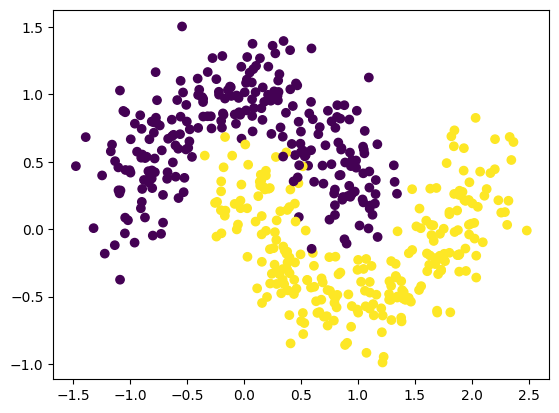

In [ ]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too

def plot_decisions(X, y, model, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.title(f"{model_name}, accuracy = {accuracy_score(y_test, y_pred)}")
    plot_decision_regions(X, y, model)
    plt.show()

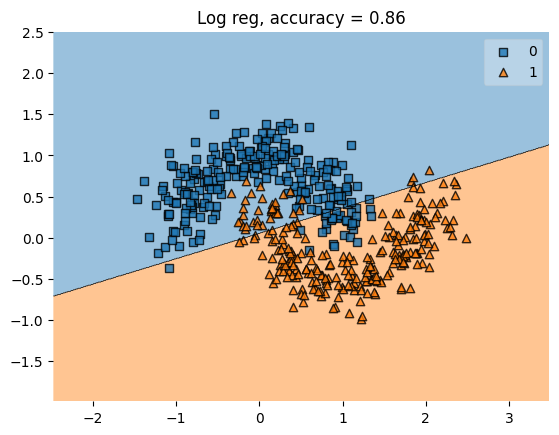

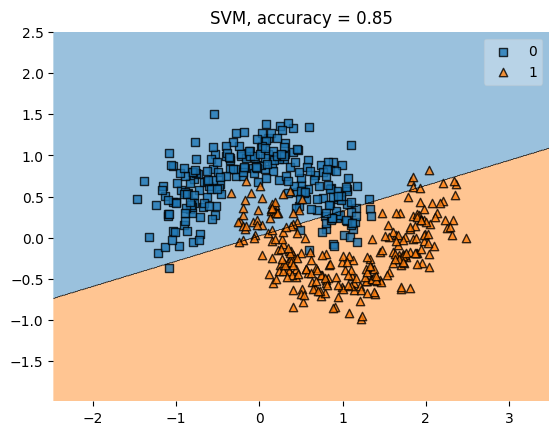

In [ ]:
plot_decisions(moons_points, moons_labels, lr, 'Log reg')
plot_decisions(moons_points, moons_labels, svm, 'SVM')

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Сигмовидная функция не очень хорошо подходит для этого образца; однако радиальная базисная функция (RBF) дает превосходные результаты.

Попробуем подкрутить параметры, чтобы добиться чего-то лучше.

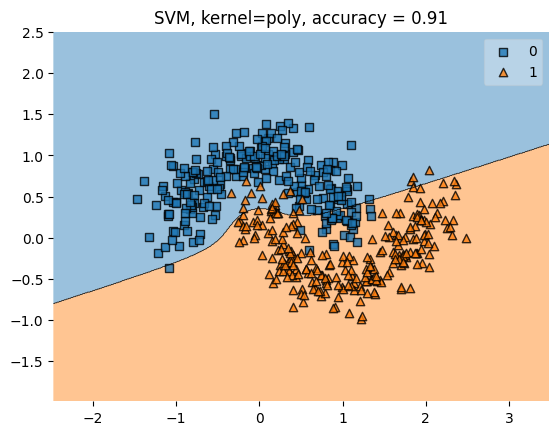

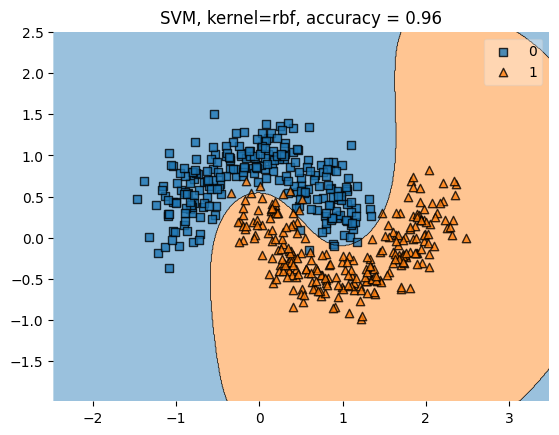

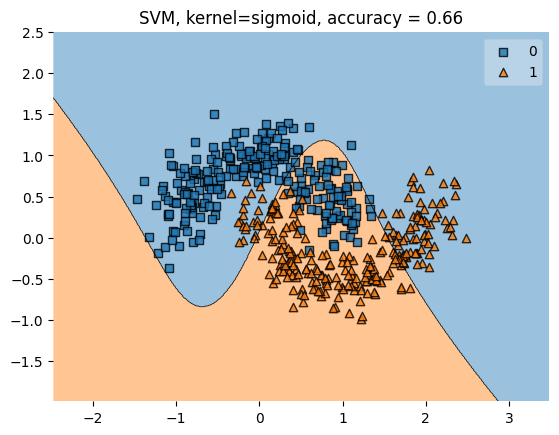

In [ ]:
kers = ['poly', 'rbf', 'sigmoid']
for ker in kers:
    plot_decisions(moons_points, moons_labels, SVC(kernel=ker, random_state=42), f'SVM, kernel={ker}')

accuracy как я думаю в данном случае является хорошей оценкой работоспособности содели, т. к. насколько я знаю accuracy плоха, только если данных какого-то класса мало по сравнению с другим, но у нас точно 50/50. Конечно нужно смотреть отдельно моменты переобучения

100%|██████████| 7/7 [00:01<00:00,  4.57it/s]



degree = 7, max_acc = 0.94, gamma_best = scale, C_best = 20


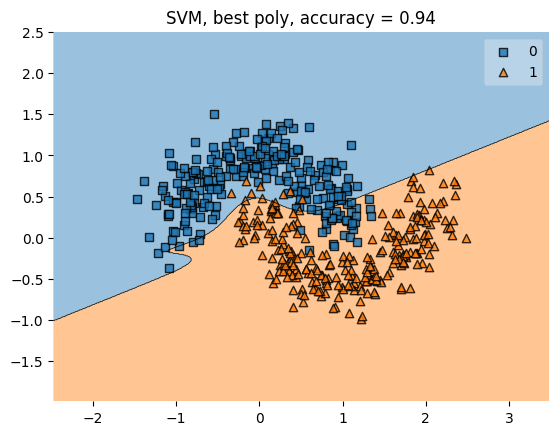

In [ ]:
from sklearn.metrics import classification_report
from tqdm import tqdm


def get_accuracy(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    return accuracy

C = [1, 5, 10, 15, 20, 25]
gamma = ['auto', 'scale']

# X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, train_size=0.8, random_state=42)
max_acc = np.float64(0)
degree = 0
gamma_best = ''
C_best = 0

for i in tqdm(range(3, 10)):
    for g in gamma:
        for c in C:
            acc = get_accuracy(moons_points, moons_labels, SVC(kernel='poly', degree=i, gamma=g, C=c))
            if (acc > max_acc):
                max_acc = acc
                degree = i
                gamma_best = g
                C_best = c
print(f'\ndegree = {degree}, max_acc = {max_acc}, gamma_best = {gamma_best}, C_best = {C_best}')
plot_decisions(moons_points, moons_labels, SVC(kernel='poly', degree=degree, gamma=gamma_best, C=C_best), f'SVM, best sigmoid')

Проварьировав параметры, стало не лучше. Похоже, что degree = 3 это лучшее, что может нам предложить SVM poly

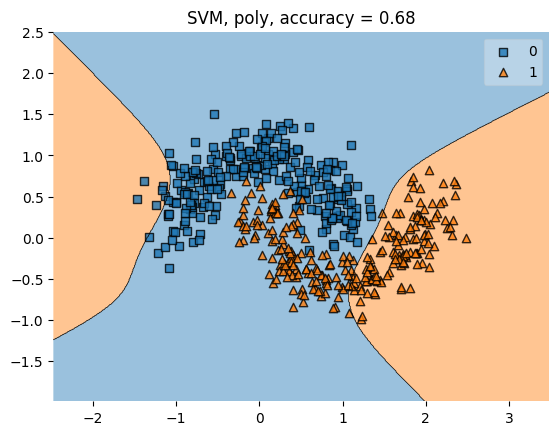

In [ ]:
plot_decisions(moons_points, moons_labels, SVC(kernel='poly', degree=6), f'SVM, poly')


max_acc = 0.98, gamma_best = scale, C_best = 10


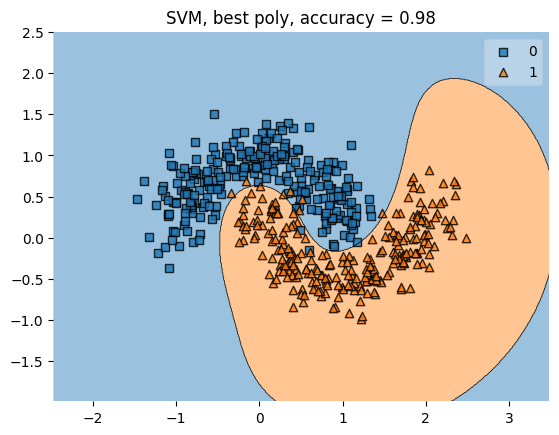

In [ ]:
C = [1, 5, 10, 15, 20, 25]
gamma = ['auto', 'scale']

max_acc = np.float64(0)
gamma_best = ''
C_best = 0

for g in gamma:
    for c in C:
        acc = get_accuracy(moons_points, moons_labels, SVC(kernel='rbf', gamma=g, C=c))
        if (acc > max_acc):
            max_acc = acc
            degree = i
            gamma_best = g
            C_best = c
print(f'\nmax_acc = {max_acc}, gamma_best = {gamma_best}, C_best = {C_best}')
plot_decisions(moons_points, moons_labels, SVC(kernel='rbf', gamma=gamma_best, C=C_best), f'SVM, best poly')

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

I use [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

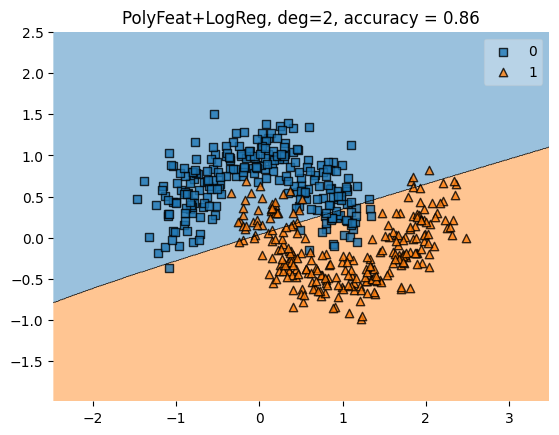

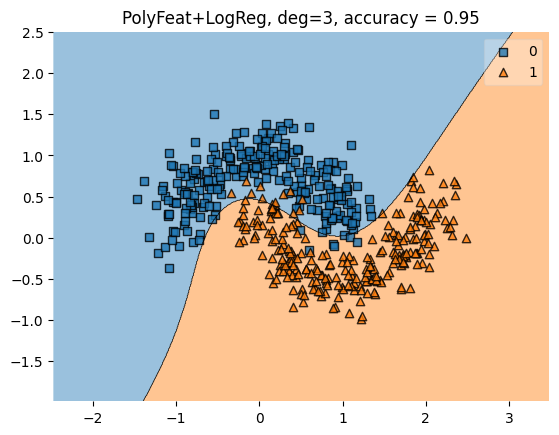

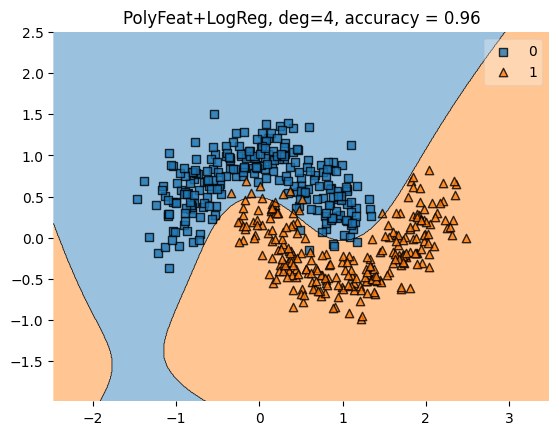

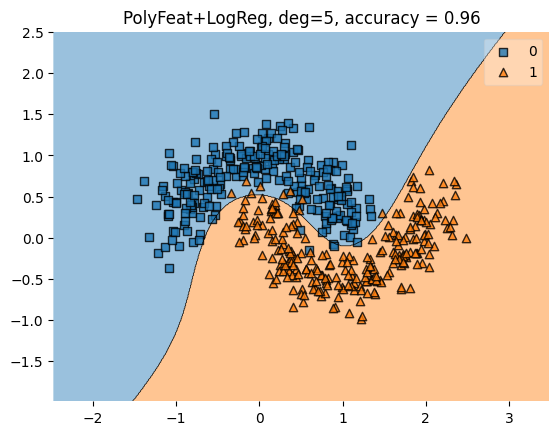

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

N = 5

for degree in range(2, N+1):
    pip = Pipeline(steps=[('polyfeat', PolynomialFeatures(degree=degree)),
                             ('logreg', LogisticRegression())])
    plot_decisions(moons_points, moons_labels, pip, f'PolyFeat+LogReg, deg={degree}')

Стало действительно лучше! Наилучший полином оказался степени 4 (хотя 3й не сильно хуже)

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

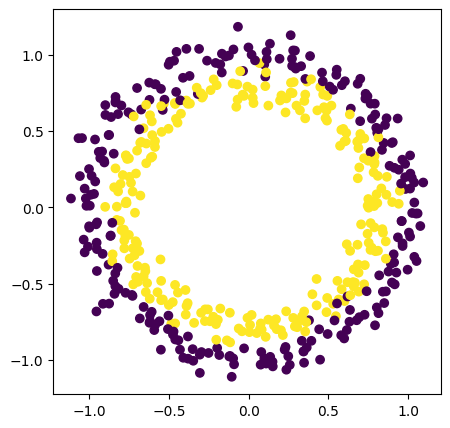

In [ ]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

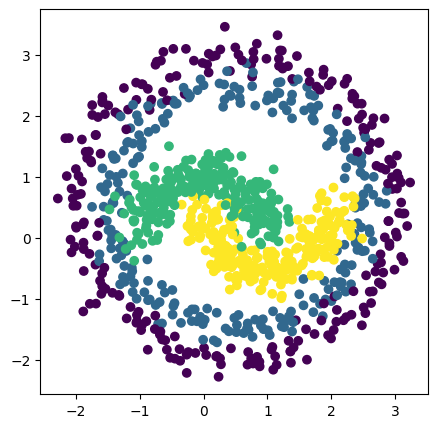

In [ ]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.


max_acc = 0.945, gamma_best = auto, C_best = 5


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


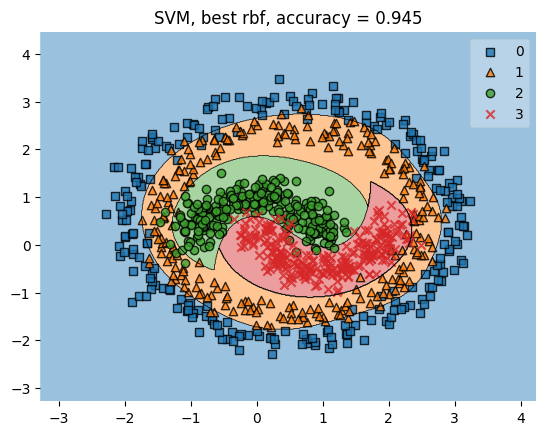

In [ ]:
# def get_best_pars_SVC_rbf()
C = [1, 5, 10, 15, 20, 25]
gamma = ['auto', 'scale']

max_acc = np.float64(0)
gamma_best = ''
C_best = 0

for g in gamma:
    for c in C:
        acc = get_accuracy(points, labels, SVC(kernel='rbf', gamma=g, C=c))
        if (acc > max_acc):
            max_acc = acc
            degree = i
            gamma_best = g
            C_best = c
print(f'\nmax_acc = {max_acc}, gamma_best = {gamma_best}, C_best = {C_best}')
plot_decisions(points, labels, SVC(kernel='rbf', gamma=gamma_best, C=C_best), f'SVM, best rbf')

Я думаю, что это хорошее решение, правда меня несколько напрягают "заезды" ораньжевого вовнутрь, но кажется это не критично.


max_acc = 0.935, neigh_best = 12


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


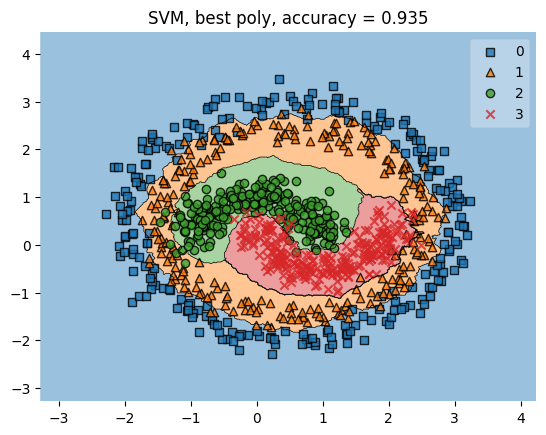

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


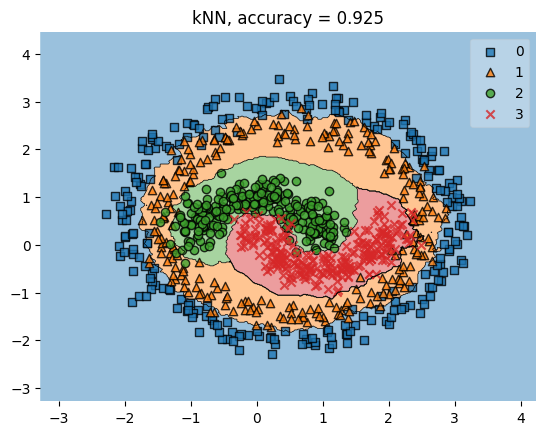

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

max_acc = np.float64(0)
neigh_best = 0

n_neigh = 15
for neigh in range(1, n_neigh):
    knn = KNeighborsClassifier(n_neighbors=neigh)
    acc = get_accuracy(points, labels, knn)
    if (acc > max_acc):
        max_acc = acc
        neigh_best = neigh

print(f'\nmax_acc = {max_acc}, neigh_best = {neigh_best}')
plot_decisions(points, labels, KNeighborsClassifier(n_neighbors=neigh_best), f'kNN best accuracy')

plot_decisions(points, labels, KNeighborsClassifier(n_neighbors=7), f'kNN')

kNN хорошо справился с задачей. Конечно есть неровности на графике, но в целом я думаю это приемлимо.

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


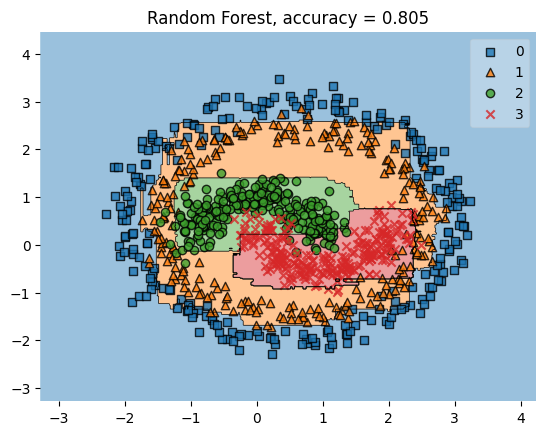

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=5)

plot_decisions(points, labels, rf, f'Random Forest')

Ожидаемо, что RandomForestClassifier будет не лучшим образом решать эту задачу. Картинки у нас круглые, а Random Forest слишком угловатый.